# **Exploratory Data Analysis Steps:**

* understanding the problem and data 
*  Import and Inspect the data
*  Handle missing data 
*  Explorate data characteristics 
*  perform data transformation 
*  Visualize data relationships 
*  Handle outliers
*  Communicate findings and insights 

# Importing Libraries #

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset #

In [461]:
df = pd.read_csv("C:/Users/Hp Hc070922/Downloads/_cancer_dataset_uae.csv")

#  Display Top 5 Rows of The Dataset #

In [462]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,None,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,None,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,None,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,None,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,None,East Asian,101,160


# Find Shape of Our Dataset (Number of Rows And Number of Columns) #

In [463]:
print('Number Of Rows : ' , df.shape[0])
print('Number Of Columns : ' , df.shape[1])

Number Of Rows :  10000
Number Of Columns :  20


# Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement #

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

# Check Null Values In The Dataset #

In [465]:
df.isna().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities              0
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [466]:
df[df['Cause_of_Death'].isna()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,None,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,None,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,None,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,None,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,None,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,None,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


# Check For Duplicate Data #

In [467]:
df.duplicated().sum()

0

# Convert Data Types #

In [468]:
df['Death_Date'].dtype

dtype('O')

In [469]:
df['Death_Date'] = pd.to_datetime(df['Death_Date'])

In [470]:
df['Death_Date'].dtype

dtype('<M8[ns]')

In [471]:
df['Diagnosis_Date'].dtype

dtype('O')

In [472]:
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'])

In [473]:
df['Diagnosis_Date'].dtype

dtype('<M8[ns]')

In [474]:
df['Treatment_Start_Date'].dtype

dtype('O')

In [475]:
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])

In [476]:
df['Treatment_Start_Date'].dtype

dtype('<M8[ns]')

In [477]:
df[['Diagnosis_Date','Treatment_Start_Date']]

,Diagnosis_Date,Treatment_Start_Date
0,2020-11-30,2020-12-04
1,2015-10-10,2015-11-05
2,2018-02-13,2018-08-03
3,2022-02-04,2022-03-13
4,2019-12-03,2020-02-29
...,...,...
9995,2016-01-21,2016-04-03
9996,2018-12-06,2019-03-23
9997,2016-06-11,2016-10-21
9998,2018-11-12,2019-02-05


In [478]:
df[['Diagnosis_Date','Treatment_Start_Date']].dtypes

Diagnosis_Date          datetime64[ns]
Treatment_Start_Date    datetime64[ns]
dtype: object

# Create Categories #

In [479]:
print('Count Of Unique Age',df['Age'].nunique())

print('\n')

print('Unique Ages' , df['Age'].unique())

Count Of Unique Age 72


Unique Ages [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]


In [480]:
df['Age'].describe()

count    10000.000000
mean        53.539700
std         20.757324
min         18.000000
25%         36.000000
50%         53.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [481]:
#create bins for the various age categories
min_age = df['Age'].min()
twenty_fifth = df['Age'].quantile(0.25)
median = df['Age'].median()
seventy_fifth = df['Age'].quantile(0.75)
maximum = df['Age'].max()

#create a label and bins for the various age categories
labels = ['young_adult', 'middle_age', 'older_adult', 'elderlies']
bins = [min_age, twenty_fifth, median, seventy_fifth, maximum]

#create a category column for age
df['Age_cat'] = pd.cut(df['Age'], labels=labels, bins=bins)

In [482]:
df[['Age','Age_cat']]

,Age,Age_cat
0,69,older_adult
1,32,young_adult
2,89,elderlies
3,78,elderlies
4,38,middle_age
...,...,...
9995,88,elderlies
9996,43,middle_age
9997,63,older_adult
9998,63,older_adult


# Fix inconsistencies #

In [483]:
for x in df.columns :
    print (df[x].unique())

['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]
['Female' 'Male' 'Other']
['Emirati' 'Expatriate']
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']
['2020-11-30T00:00:00.000000000' '2015-10-10T00:00:00.000000000'
 '2018-02-13T00:00:00.000000000' ... '2019-06-21T00:00:00.000000000'
 '2022-09-18T00:00:00.000000000' '2016-06-11T00:00:00.000000000']
['Liver' 'Leukemia' 'Lung' 'Pancreatic' 'Breast' 'Ovarian' 'Prostate'
 'Colorectal']
['II' 'III' 'I' 'IV']
['Radiation' 'Surgery' 'Chemotherapy' 'Immunotherapy']
['2020-12-04T00:00:00.000000000' '2015-11-05T00:00:00.000000000'
 '2018-08-03T00:00:00.000000000' ... '2024-06-02T00:00:00.000000000'
 '2016-09-16T00:00:00.000000000' '2017-12-23T00:00:00.000000000']
['S

In [484]:
df.describe(include= object)

,Patient_ID,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,992,10000,10000,10000
unique,10000,3,2,7,8,4,4,4,8614,3,2,3,4,5
top,PAT000001,Female,Emirati,Ajman,Leukemia,III,Radiation,Sheikh Khalifa Hospital,Dr. AJ25,Recovered,Complications,Non-Smoker,None,South Asian
freq,1,4985,5920,1497,1314,3041,2519,2541,5,4931,507,5038,4047,2083


# visualizations #

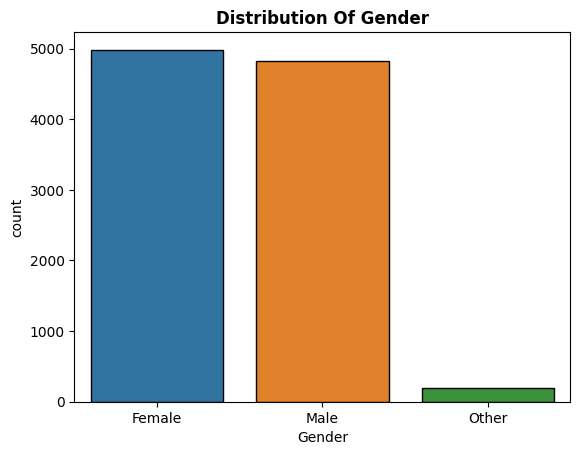

In [485]:
sns.countplot(data = df , x = 'Gender',hue = 'Gender',edgecolor = 'Black')
plt.title('Distribution Of Gender',fontweight = 'bold')
plt.show()

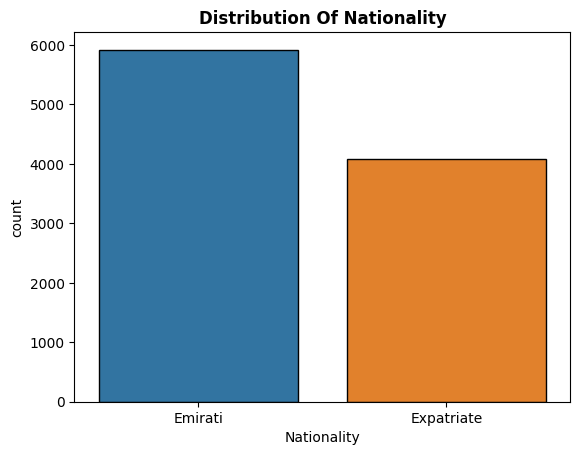

In [486]:
sns.countplot(data = df , x = 'Nationality',hue = 'Nationality',edgecolor = 'Black')
plt.title('Distribution Of Nationality',fontweight = 'bold')
plt.show()

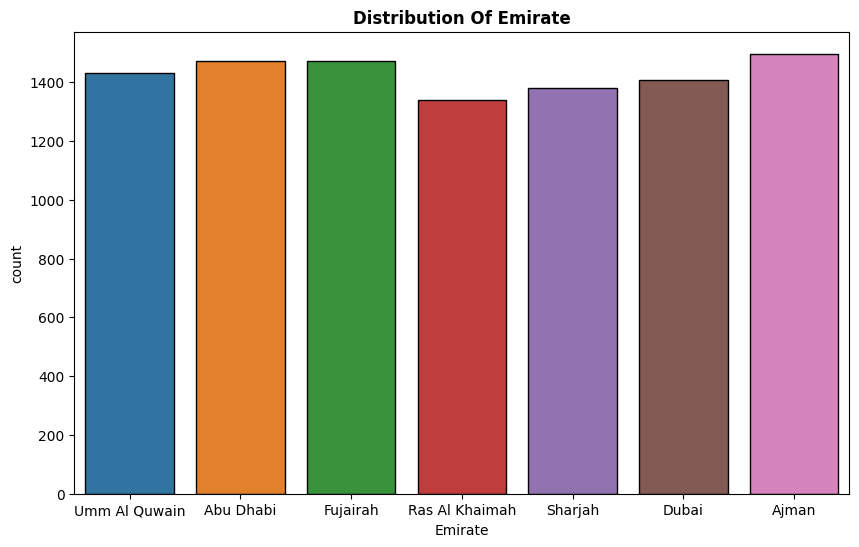

In [487]:
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = 'Emirate',hue = 'Emirate',edgecolor = 'Black')
plt.title('Distribution Of Emirate',fontweight = 'bold')
plt.show()

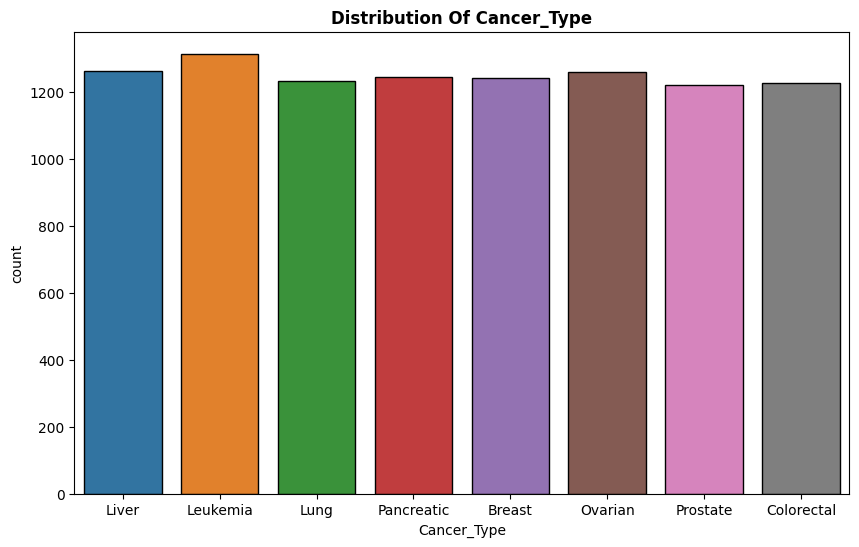

In [488]:
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = 'Cancer_Type',hue = 'Cancer_Type',edgecolor = 'Black')
plt.title('Distribution Of Cancer_Type',fontweight = 'bold')
plt.show()

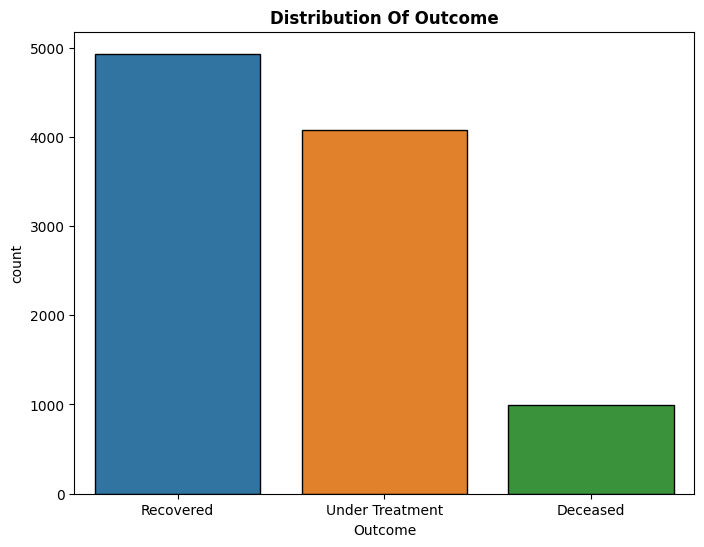

In [489]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Outcome',hue = 'Outcome',edgecolor = 'Black')
plt.title('Distribution Of Outcome',fontweight = 'bold')
plt.show()

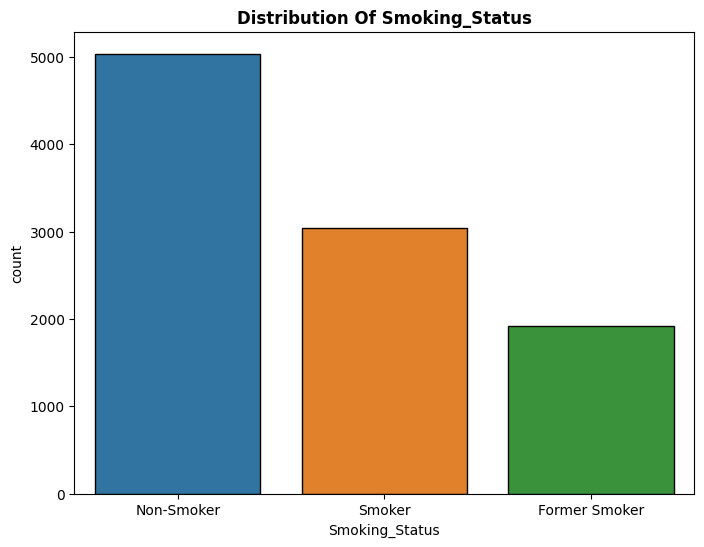

In [490]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Smoking_Status',hue = 'Smoking_Status',edgecolor = 'Black')
plt.title('Distribution Of Smoking_Status',fontweight = 'bold')
plt.show()

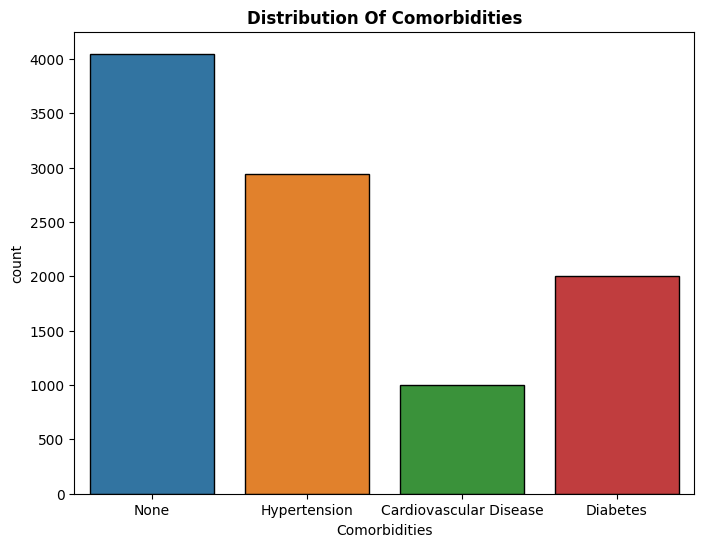

In [491]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Comorbidities',hue = 'Comorbidities',edgecolor = 'Black')
plt.title('Distribution Of Comorbidities',fontweight = 'bold')
plt.show()

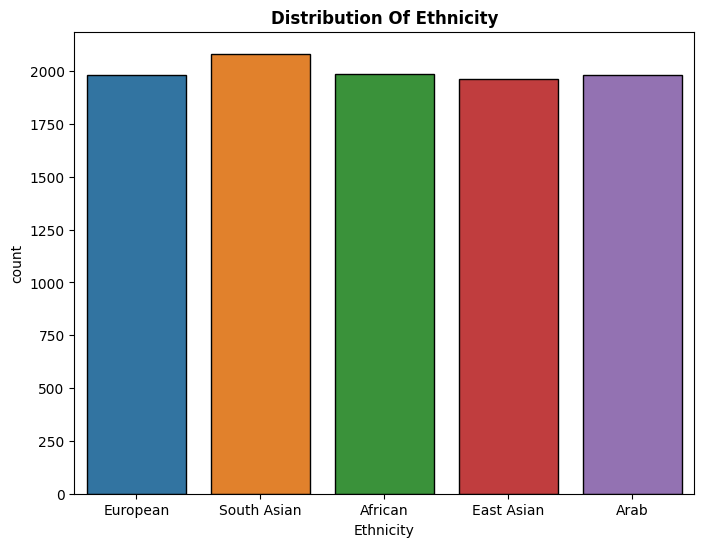

In [492]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Ethnicity',hue = 'Ethnicity',edgecolor = 'Black')
plt.title('Distribution Of Ethnicity',fontweight = 'bold')
plt.show()

In [493]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,...,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,Age_cat
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,...,Dr. VO41,Recovered,NaT,NaN,Non-Smoker,None,European,61,157,older_adult
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,...,Dr. SM31,Recovered,NaT,NaN,Smoker,None,South Asian,80,175,young_adult
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,...,Dr. BC7,Under Treatment,NaT,NaN,Non-Smoker,None,South Asian,50,175,elderlies
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,...,Dr. TC14,Recovered,NaT,NaN,Former Smoker,None,African,44,155,elderlies
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,...,Dr. YS37,Recovered,NaT,NaN,Former Smoker,None,East Asian,101,160,middle_age


In [494]:
df[['Age','Weight','Height']].describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


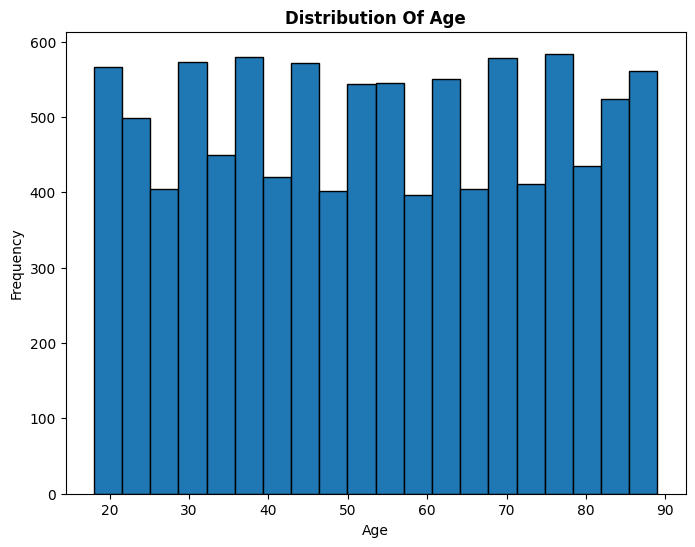

In [495]:
plt.figure(figsize=(8,6))
df['Age'].plot(kind='hist',edgecolor = 'black',bins=20)
plt.title('Distribution Of Age',fontweight = 'bold')
plt.xlabel('Age')
plt.show()

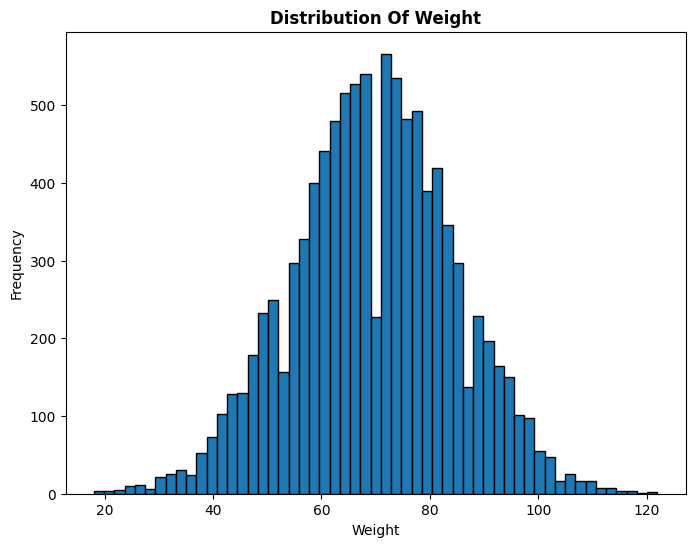

In [496]:
plt.figure(figsize=(8,6))
df['Weight'].plot(kind='hist',edgecolor = 'black',bins=55)
plt.title('Distribution Of Weight',fontweight = 'bold')
plt.xlabel('Weight')
plt.show()

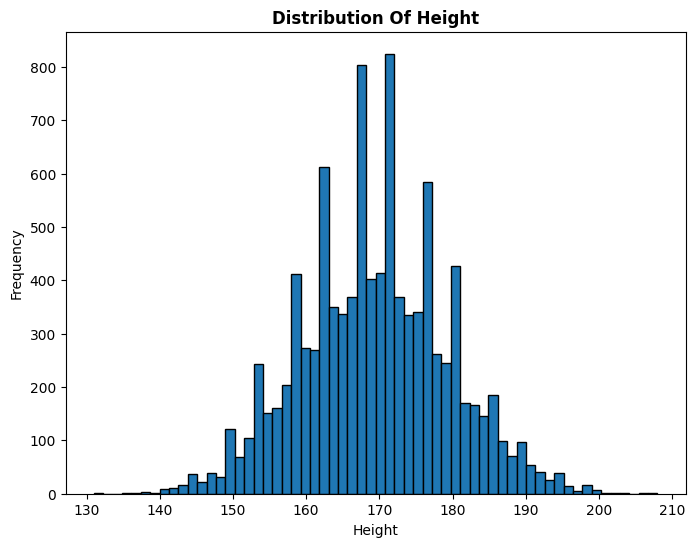

In [497]:
plt.figure(figsize=(8,6))
df['Height'].plot(kind='hist',edgecolor = 'black',bins=60)
plt.title('Distribution Of Height',fontweight = 'bold')
plt.xlabel('Height')
plt.show()

# Identify skewness and outliers #

In [498]:
skew_age = df['Age'].skew()
print(f"Skew Value of Age Column: {skew_age:.4f}")

if skew_age > 0:
    print("The distribution of age is right-skewed (positively skewed).")
elif skew_age < 0:
    print("The distribution of age is left-skewed (negatively skewed).")
else:
    print("The distribution of age is symmetrical.")


Skew Value of Age Column: 0.0038
The distribution of age is right-skewed (positively skewed).


In [499]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# استخراج الـ outliers فقط
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]


In [500]:
print(outliers['Age'].unique())


[]


In [501]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]

In [502]:
print(outliers['Weight'].unique())


[ 27  18 117  24 112  28  29  23 118  26 111 114  25 122 113 116 120  19
  21  22 115]


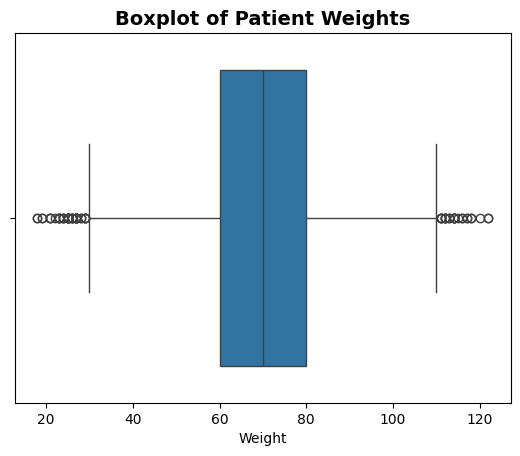

In [503]:
sns.boxplot(data = df , x ='Weight')
plt.title("Boxplot of Patient Weights", fontsize=14, fontweight='bold')
plt.show()

# visualize data relationship # 

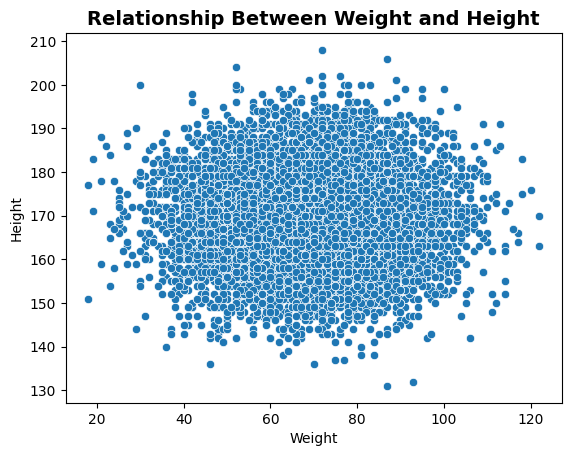

In [504]:
sns.scatterplot(data = df ,x = 'Weight' , y = 'Height')
plt.title("Relationship Between Weight and Height", fontsize=14, fontweight='bold')
plt.show()

In [505]:
heatmap = df[['Weight','Height']].corr()

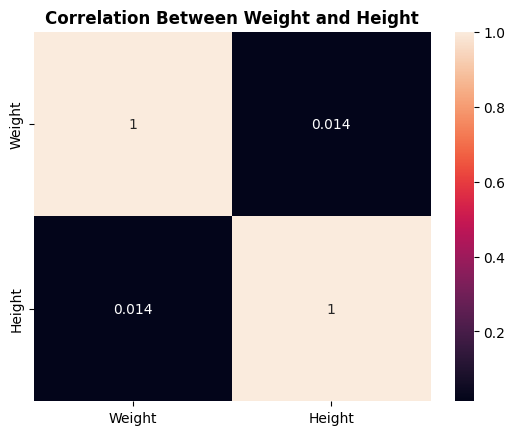

In [506]:
sns.heatmap(heatmap , annot= True)
plt.title("Correlation Between Weight and Height", fontsize=12, fontweight='bold')
plt.show()

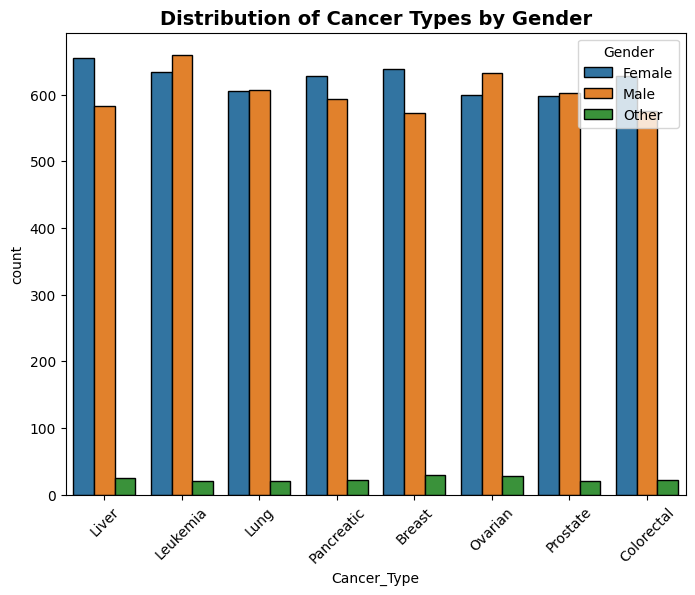

In [507]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Cancer_Type',hue = 'Gender',edgecolor = 'Black')
plt.title("Distribution of Cancer Types by Gender", fontsize=14, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

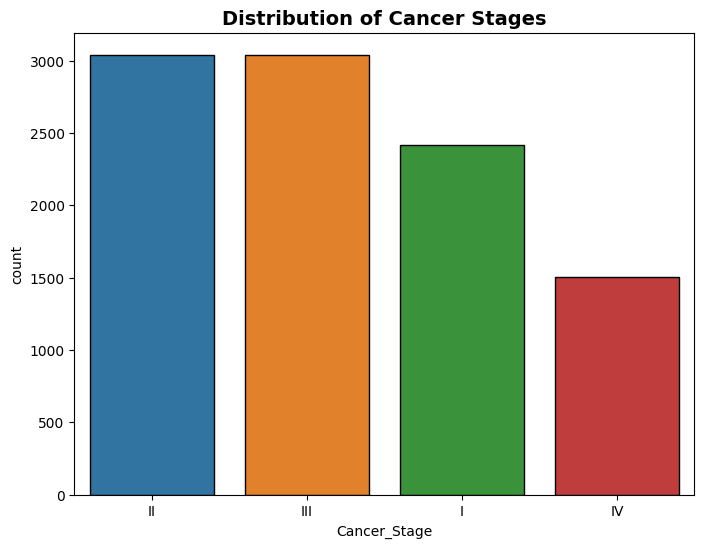

In [508]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Cancer_Stage',hue = 'Cancer_Stage',edgecolor = 'Black')
plt.title("Distribution of Cancer Stages"  , fontsize=14, fontweight='bold')
plt.show()

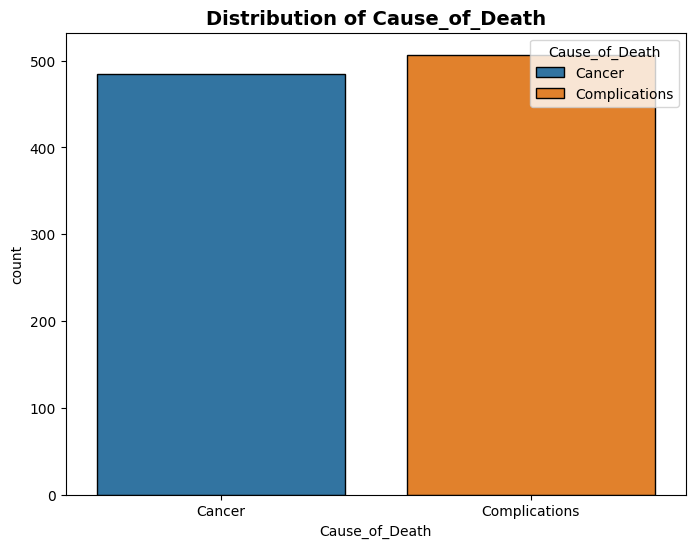

In [509]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Cause_of_Death',hue = 'Cause_of_Death',edgecolor = 'Black')
plt.title("Distribution of Cause_of_Death"  , fontsize=14, fontweight='bold')
plt.show()

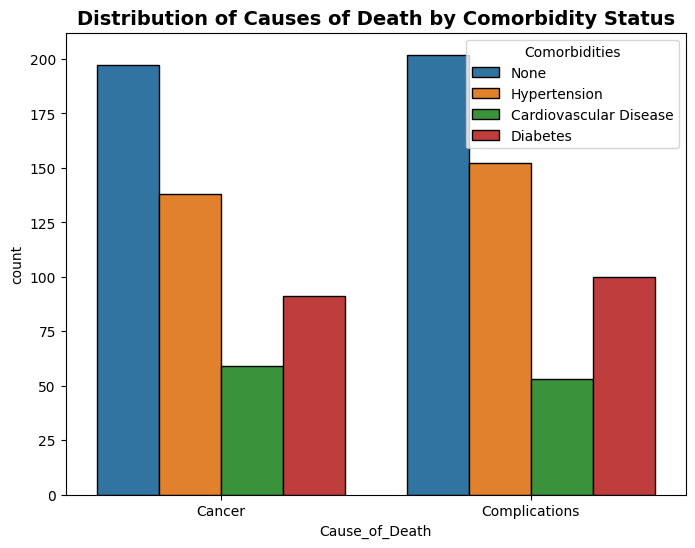

In [510]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Cause_of_Death',hue = 'Comorbidities',edgecolor = 'Black')
plt.title("Distribution of Causes of Death by Comorbidity Status"  , fontsize=14, fontweight='bold')
plt.show()

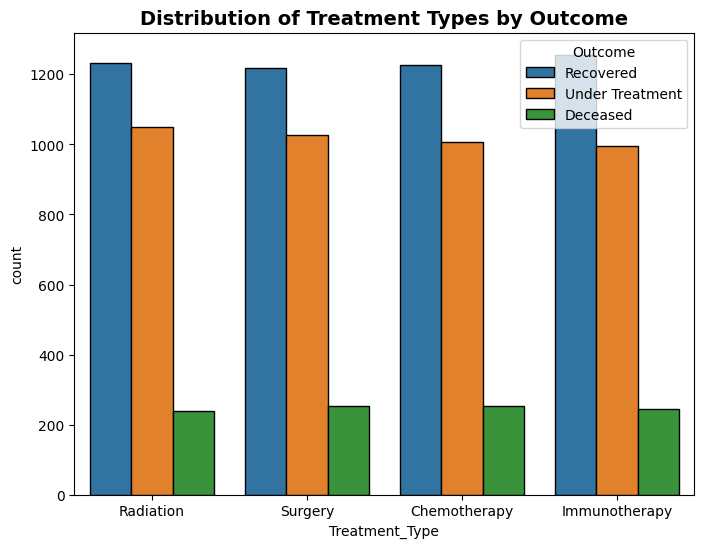

In [511]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Treatment_Type',hue = 'Outcome',edgecolor = 'Black')
plt.title("Distribution of Treatment Types by Outcome"  , fontsize=14, fontweight='bold')
plt.show()

# Create a timedelta column and categories into groups #

In [512]:
df['Time_delta'] = df['Treatment_Start_Date'] - df['Diagnosis_Date']

In [513]:
df['Time_delta']

0        4 days
1       26 days
2      171 days
3       37 days
4       88 days
         ...   
9995    73 days
9996   107 days
9997   132 days
9998    85 days
9999    98 days
Name: Time_delta, Length: 10000, dtype: timedelta64[ns]

In [514]:
df['Time_delta'].describe()

count                         10000
mean        89 days 08:19:40.800000
std      52 days 07:11:18.298964457
min                 0 days 00:00:00
25%                44 days 00:00:00
50%                90 days 00:00:00
75%               135 days 00:00:00
max               179 days 00:00:00
Name: Time_delta, dtype: object

In [515]:
#check for the number of unique time_delta
print('count of unique time_delta :', df['Time_delta'].nunique())

#create bins for the various age categories
min_day = df['Time_delta'].min()
twenty_fifth = df['Time_delta'].quantile(0.25)
median = df['Time_delta'].median()
seventy_fifth = df['Time_delta'].quantile(0.75)
maximum = df['Time_delta'].max()

#create a label and bins for the various age categories
labels = ['immediate start', 'early start', 'moderate delay', 'delayed start']
bins = [min_day, twenty_fifth, median, seventy_fifth, maximum]

#create a category column for age
df['Time_delta_cat'] = pd.cut(df['Time_delta'], labels=labels, bins=bins)

count of unique time_delta : 180


In [516]:
df[['Time_delta','Time_delta_cat']]

,Time_delta,Time_delta_cat
0,4 days,immediate start
1,26 days,immediate start
2,171 days,delayed start
3,37 days,immediate start
4,88 days,early start
...,...,...
9995,73 days,early start
9996,107 days,moderate delay
9997,132 days,moderate delay
9998,85 days,early start


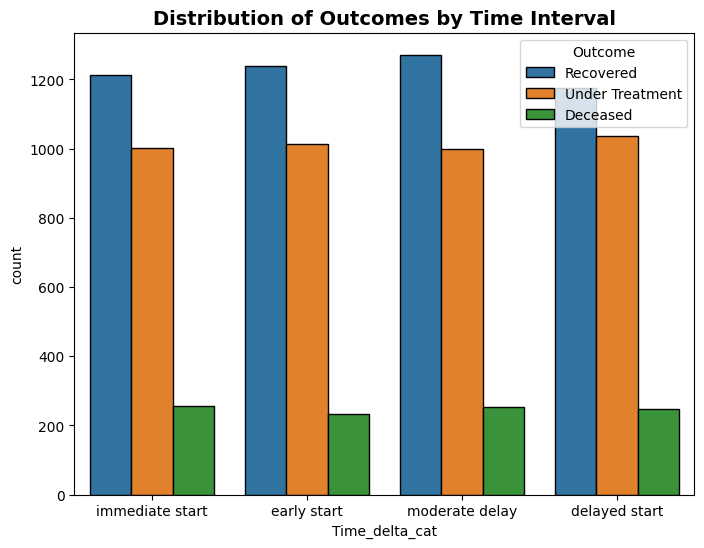

In [517]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Time_delta_cat',hue = 'Outcome',edgecolor = 'black')
plt.title("Distribution of Outcomes by Time Interval", fontsize=14, fontweight='bold')
plt.show()

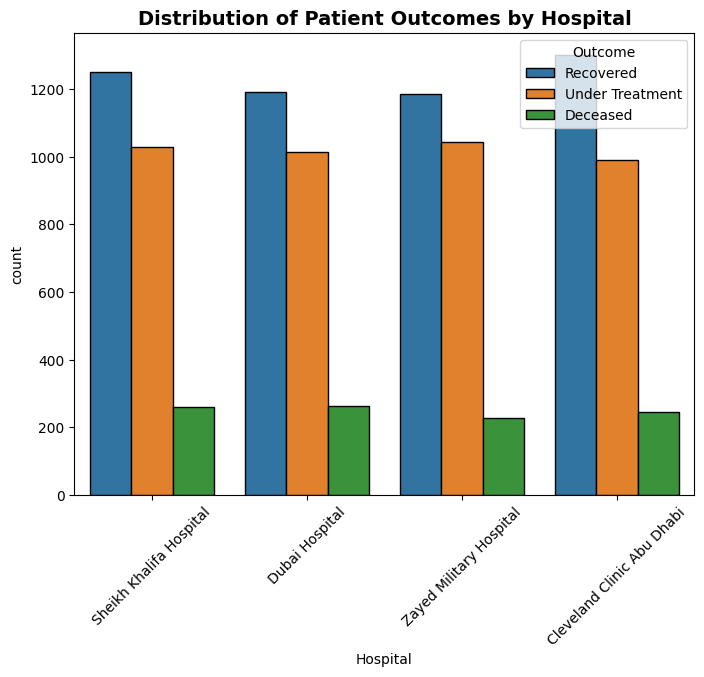

In [518]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'Hospital',hue = 'Outcome',edgecolor = 'black')
plt.title("Distribution of Patient Outcomes by Hospital", fontsize=14, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()